In [177]:
# Loading matrices
import os
import glob

folder = 'D:\\adjacency_matrices_NetworkToolbox_INF\\'
all_matrices = glob.glob(folder + 'sub*_adj_*')

In [202]:
# Storing matrices into 3d numpy array
import pandas as pd
import numpy as np

#all_matrices = all_matrices[0:200] # for testing purposes
X = np.zeros([57, 57, len(all_matrices)])
participants_id = []
for i, matrix in enumerate(all_matrices):
    X[:,:,i] = np.array(pd.read_csv(matrix).iloc[: , 1:])
    np.fill_diagonal(X[:,:,i], 0)
    participants_id.append(matrix.split('_')[4])
    
participants_id = list(map(int, participants_id))


In [213]:
from sklearn.cluster import KMeans

# Where to store all kmeans
all_kmeans = []

# Reshaping 3d array into 2d array of size Nsamples X N features
nx, ny, nsamples = X.shape
Xtrain = X.reshape((nsamples, nx*ny)).T

for subject in np.unique(participants_id):
    mask = np.where(participants_id == subject, True, False)
    this_subject_data = Xtrain[:,mask]
    all_kmeans.append(KMeans(n_clusters=7, random_state=0).fit_predict(this_subject_data))


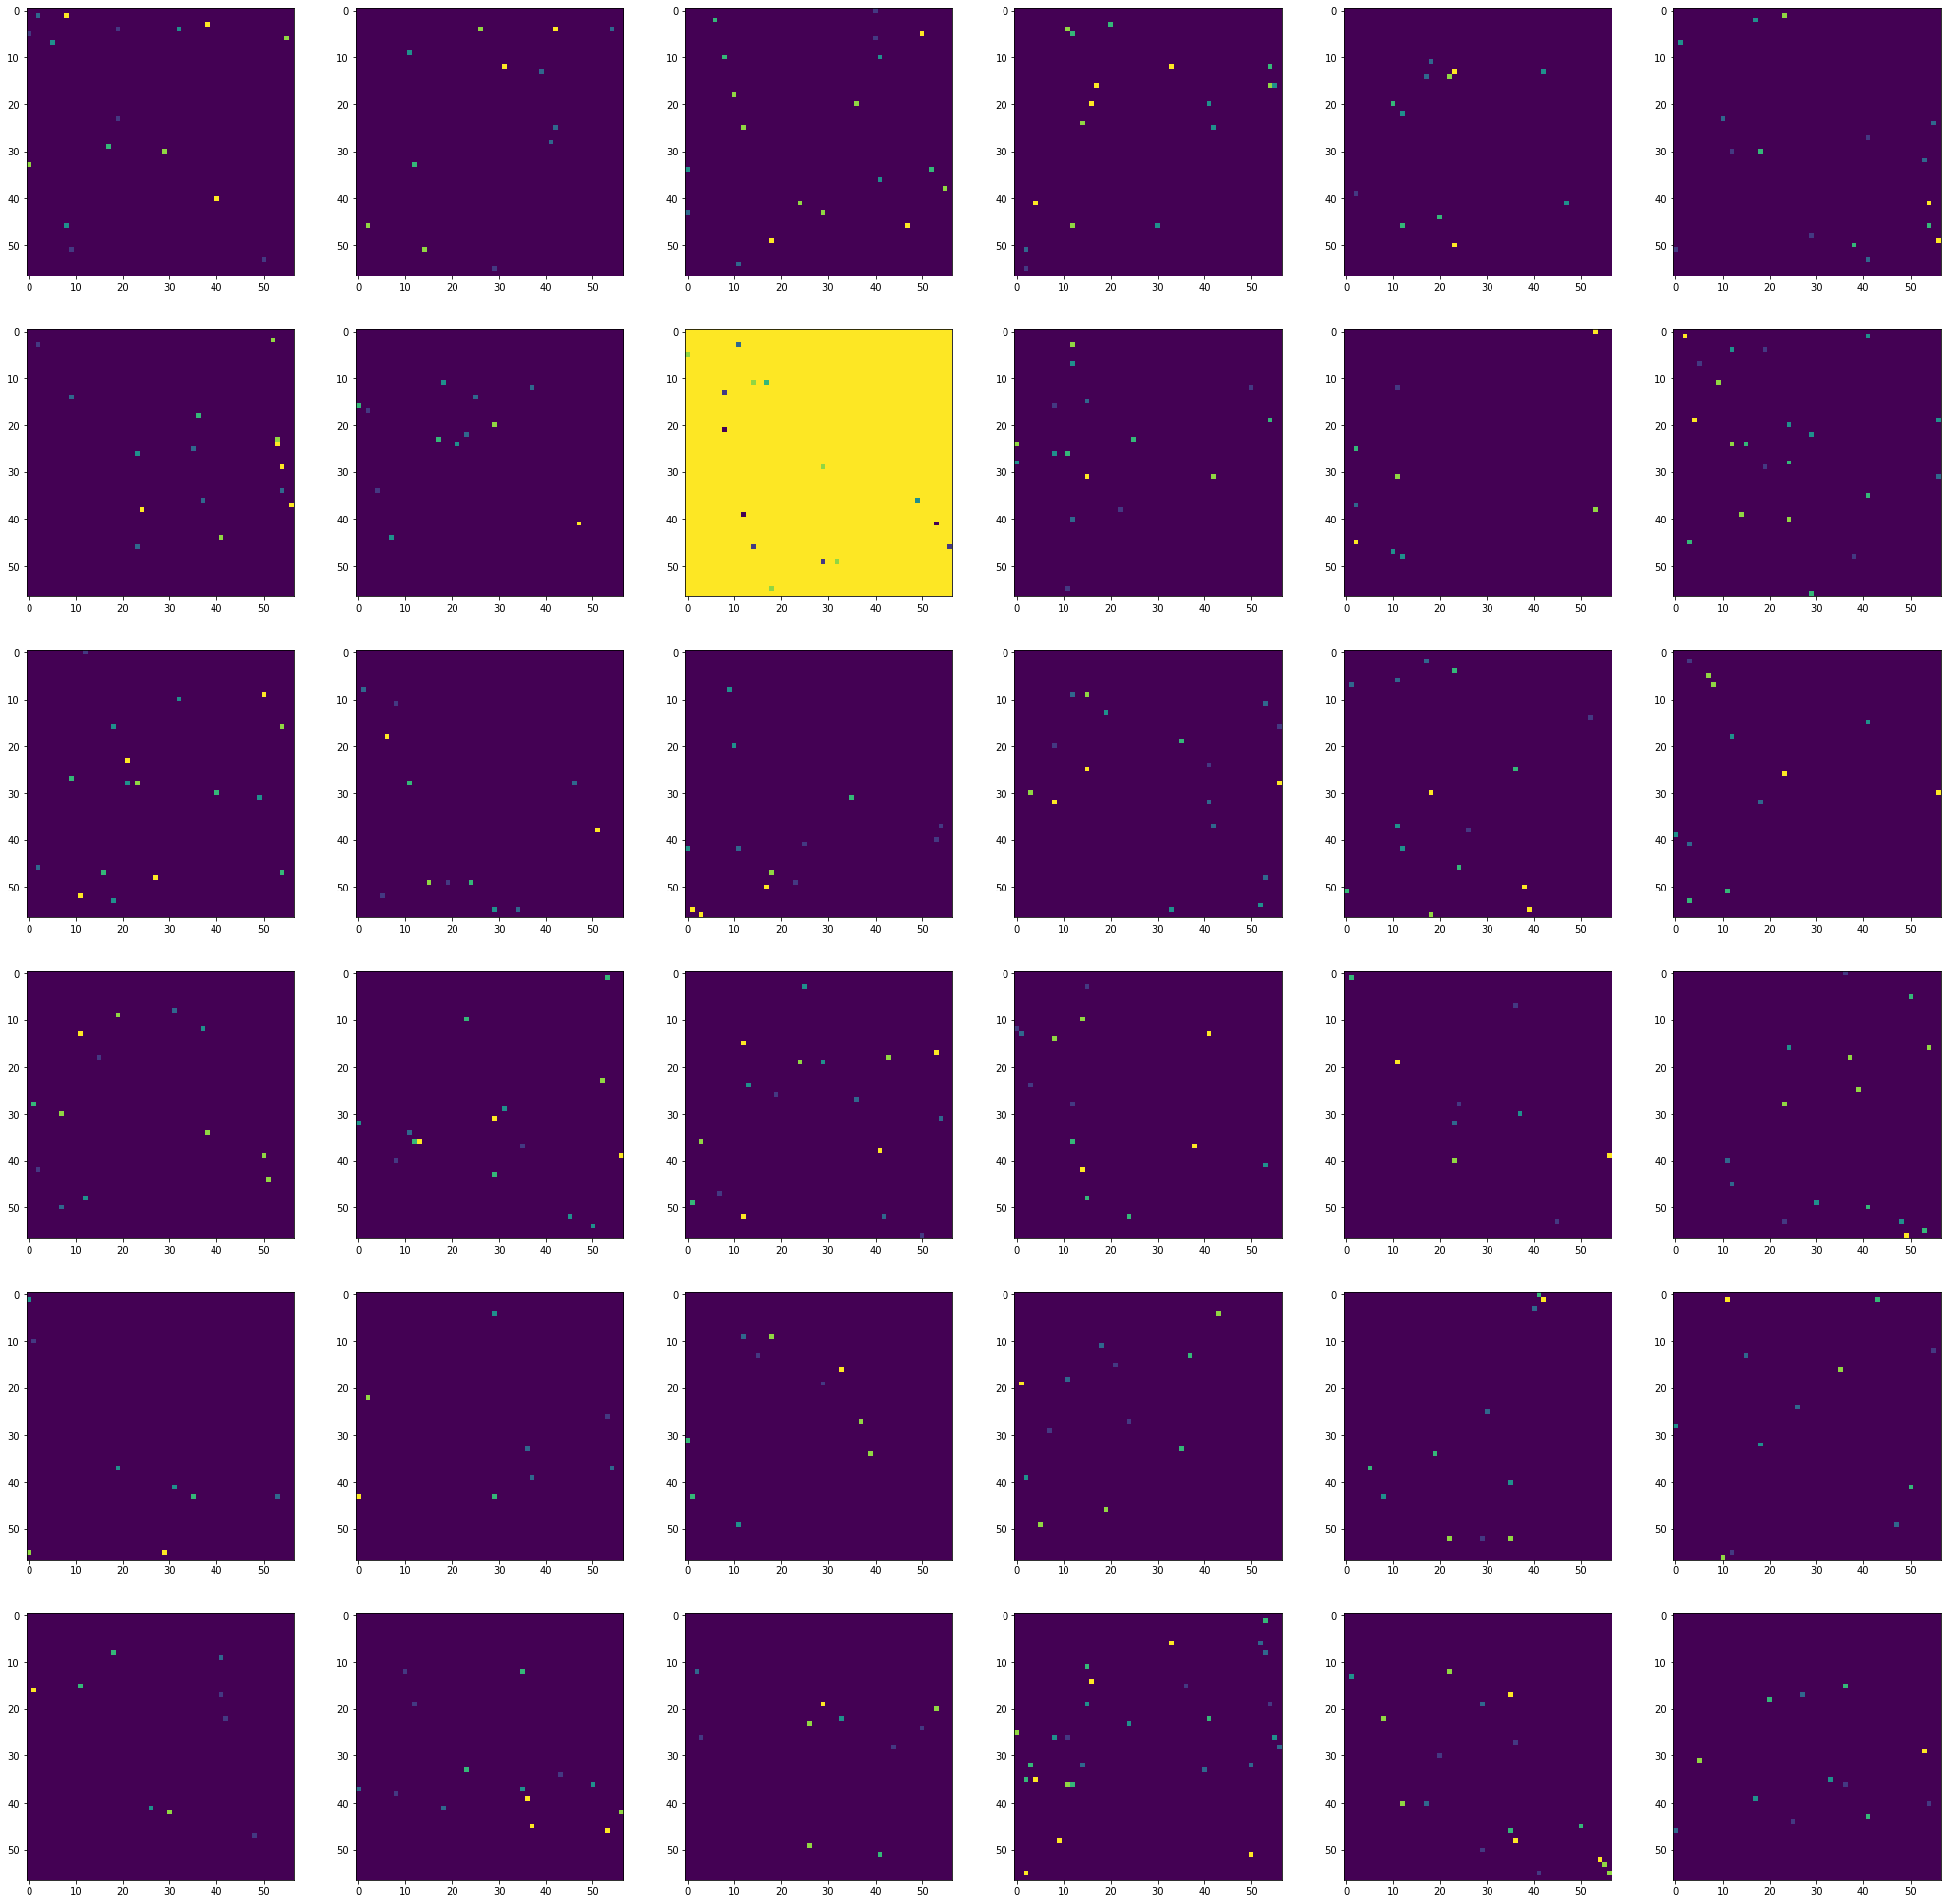

In [224]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(35,35))
fig.patch.set_facecolor('xkcd:white')

for i, this_kmean in enumerate(all_kmeans):
    row = int(i/6);
    col = int(i%6); 
    axes[row][col].imshow(all_kmeans[i].reshape([57,57]))

In [171]:
# Implementation of elbow method
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Xtrain)
    distortions.append(kmeanModel.inertia_)

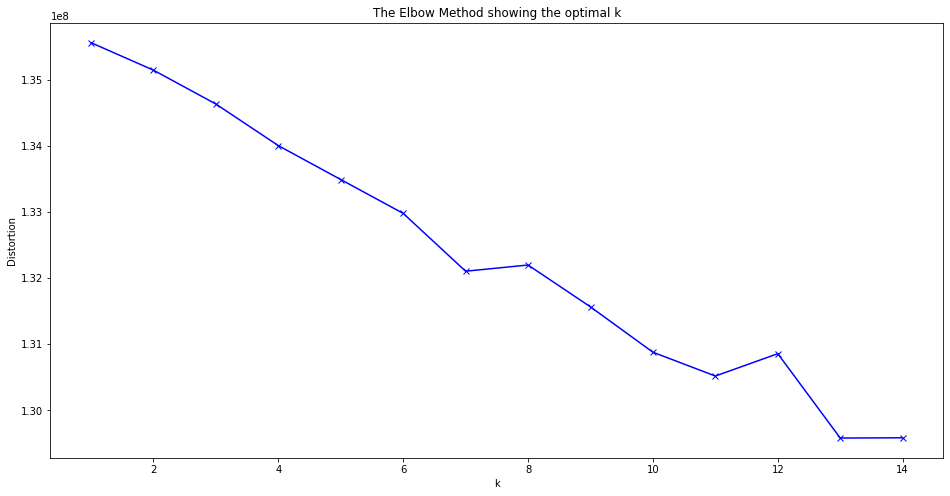

In [172]:
fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('xkcd:white')

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()